### Learning linear regression from an example on scikit-learn.

The example code is on http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

At first, impoirt numpy, matplotlib, and scikit-learn.
With these libraries, you do not need to implement linear regression and other analytic functions, such as computing r2 score, MSE errors, and drawing graphs.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Load the diabetes dataset, which is already inherent in the scikit-learn.

In [6]:
diabetes = datasets.load_diabetes()

In [7]:
diabetes

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

We can see that this dataset is composed of features - age, sex, bmi, bp, s1~s6 and targets).
Let's look the data structure.

In [37]:
diabetes_X = diabetes.data
diabetes_X.shape

(442, 10)

The data describe total 442 samples composed of 10 features, and

In [11]:
diabetes_Y = diabetes.target
diabetes_Y.shape

(442,)

The target describe some 442 values related with occurence of diabetes.

We will only use one feature - bmi, as did in the tutorial on the official page of scikit-learn.
We want to find the relationship between the feature, in this case bmi, and the targets.
The label of 'bmi' feature is 2 and we only need these data

In [44]:
diabetes_bmi = diabetes_X[:, np.newaxis, 2]
diabetes_bmi.shape

(442, 1)

We finish preparing data to find a relationship between the bmi and target values.

Before to find the relationship, we have to split the dataset - train set and test set.
We will use the train set to find the relationship, in other words, for a regression task, and will use the test to validate the relationship.

I will use 400 samples of total 442 for the train set, and the rest for the test set.

In [45]:
bmi_train = diabetes_bmi[:400]
target_train = diabetes_Y[:400]
bmi_train.shape, target_train.shape

((400, 1), (400,))

In [46]:
bmi_test = diabetes_bmi[400:]
target_test = diabetes_Y[400:]
bmi_test.shape, target_test.shape

((42, 1), (42,))

Yes, we finish preparing the ingredients. Let's cook the data.

At first, we should set a model what we want to do - linear regression task.

In [47]:
regr = linear_model.LinearRegression()

Then, optimize the model by just typing simple keywords.

In [49]:
regr.fit(bmi_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can obatin the optimized coefficients of the task

In [51]:
regr.coef_

array([ 955.70303385])

We should check the performance of the task using the test set

In [52]:
y_pred = regr.predict(bmi_test)

In [54]:
mse_error = mean_squared_error(target_test, y_pred)
mse_error

3171.1118016053833

In [55]:
r2 = r2_score(target_test, y_pred)
r2

0.42720426706720194

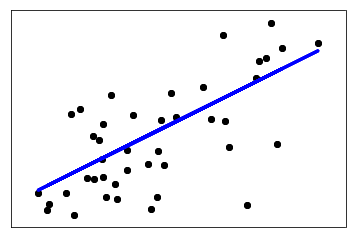

In [59]:
plt.scatter(bmi_test, target_test, color='black')
plt.plot(bmi_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

The blue line is the model obtained by using the train set, and black dots are actual values for each bmi sample.
The performance can be measured by various way, however, we check the mean-squared-error and r2-variance score in here.
Learn further in this link - https://en.wikipedia.org/wiki/Coefficient_of_determination .


In this exercise, we do not implement linear regression model, analytics, and plotting. We can easily do those things by import python libraries and typing.

Capturing the things what we have to know and have to do is the first step to do, and search functions wheter they are already implemented or not. If yes, just using it! That's why we use python and can enjoy data science. 